# Project 03
##**Part 1: Students Performance in Exams**

###Mounting Drive and Getting Data from Kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install opendatasets

In [4]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/spscientist/students-performance-in-exams')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nimrabasit
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams


100%|██████████| 8.70k/8.70k [00:00<00:00, 14.6MB/s]

###Importing Libraries

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from matplotlib.colors import ListedColormap

Data Preprocessing

In [19]:
# Load dataset
df = pd.read_csv("students-performance-in-exams/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Checking for Total Rows & Columns, Null & Duplicate Values.

In [14]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')
print(f'The dataset has {df.isna().sum().sum()} null values.')
print(f'The dataset has {df.duplicated().sum()} duplicate rows.')

The dataset has 1000 rows and 8 columns.
The dataset has 0 null values.
The dataset has 0 duplicate rows.


Checking Data Types for the Columns.

In [16]:
df.dtypes

,0
gender,object
race/ethnicity,object
parental level of education,object
lunch,object
test preparation course,object
math score,int64
reading score,int64
writing score,int64


Describing Data for Descriptive Statisitics

In [21]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


###Exploratory Data Analysis

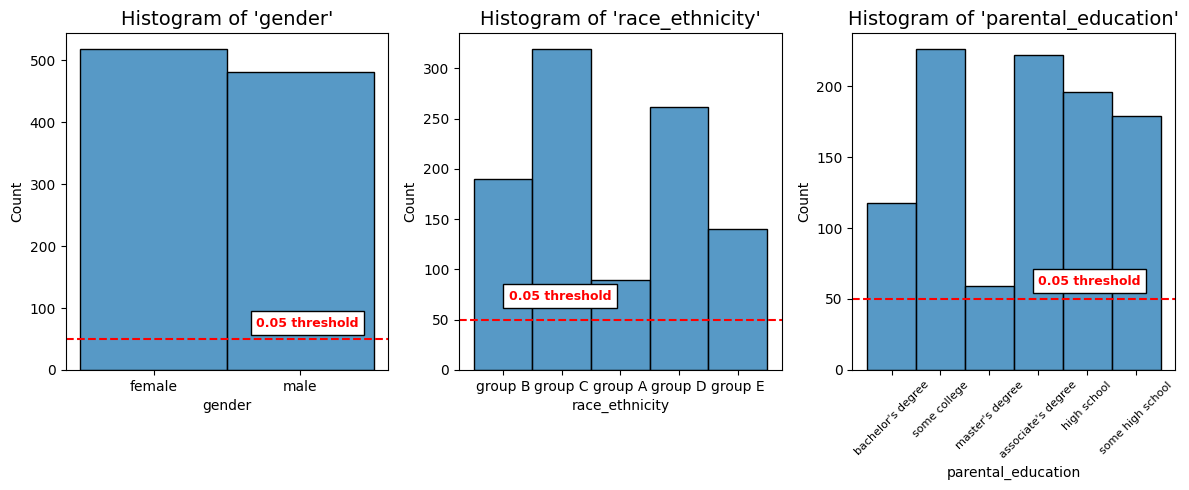

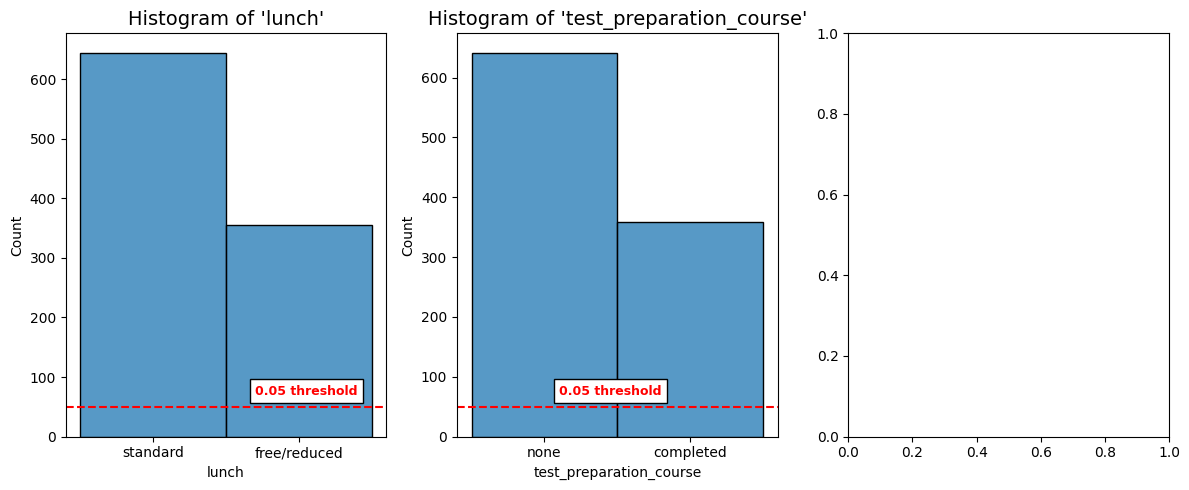

In [60]:
cat_cols = [col for col in df.columns if df[col].dtypes == 'O']
num_cols = [col for col in df.columns if df[col].dtypes != 'O']

# Defining a 5% threshold on the total amount of data
five_perc_threshold = int(len(df) * 0.05)


for i in range(2):

    fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(12,5))

    ax1 = sns.histplot(df[cat_cols[i*3]], ax=ax1)
    ax1.axhline(five_perc_threshold, ls='--', color='red')
    ax1.text(x=0.7, y=70, s="0.05 threshold", fontsize=9, color='red', weight='bold', bbox=dict(facecolor='white'))
    ax1.set_title(f"Histogram of '{cat_cols[i*3]}'", size=14)

    ax2 = sns.histplot(df[cat_cols[i*3+1]], ax=ax2)
    ax2.axhline(five_perc_threshold, ls='--', color='red')
    ax2.text(x=0.1, y=70, s="0.05 threshold", fontsize=9, color='red', weight='bold', bbox=dict(facecolor='white'))
    ax2.set_title(f"Histogram of '{cat_cols[i*3+1]}'", size=14)

    if i < 1:
        ax3 = sns.histplot(df[cat_cols[i*3+2]], ax=ax3)
        ax3.axhline(five_perc_threshold, ls='--', color='red')
        ax3.text(x=3, y=60, s="0.05 threshold", fontsize=9, color='red', weight='bold', bbox=dict(facecolor='white'))
        ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, size=8)
        ax3.set_title(f"Histogram of '{cat_cols[i*3+2]}'", size=14)

    plt.tight_layout()

Seems the classes have frequencies higher than the 0.05 threshold; there are no rare classes.

Almost equally  between Male/Female split

Highly educated people are a minority.

###Numerical Variables

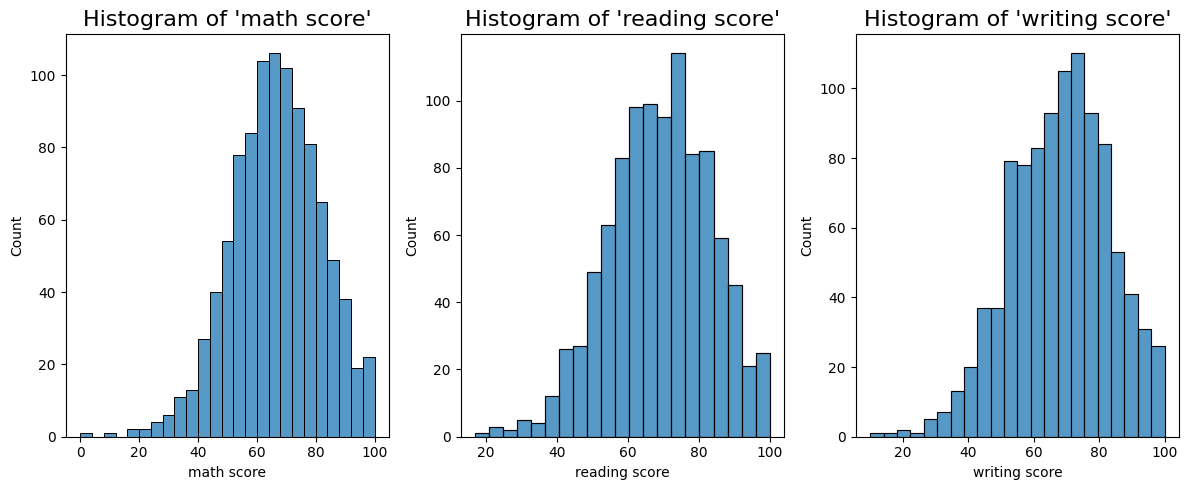

In [29]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(12,5))

ax1 = sns.histplot(df['math score'], ax=ax1)
ax1.set_title("Histogram of 'math score'", size=16)

ax2 = sns.histplot(df['reading score'], ax=ax2)
ax2.set_title("Histogram of 'reading score'", size=16)

ax3 = sns.histplot(df['writing score'], ax=ax3)
ax3.set_title("Histogram of 'writing score'", size=16)

plt.tight_layout()

In [67]:
# Features and target
X = df.drop(columns=["math_score"])
y = df["math_score"]

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include="object").columns
numerical_cols = X.select_dtypes(include="number").columns

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(), categorical_cols),
    ("num", StandardScaler(), numerical_cols)
])

In [63]:
print(df.columns)

Index(['gender', 'race_ethnicity', 'parental_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')


###Multilinear Regression Pipeline

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline with preprocessing + linear regression
linear_pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("regressor", LinearRegression())
])

linear_pipeline.fit(X_train, y_train)
y_pred_linear = linear_pipeline.predict(X_test)


###Polynomial Regression (Degree=2)

In [69]:
# Pipeline for polynomial regression
poly_pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("regressor", LinearRegression())
])

poly_pipeline.fit(X_train, y_train)
y_pred_poly = poly_pipeline.predict(X_test)


###Model Evaluation

In [70]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} Evaluation:")
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("R² Score:", r2_score(y_true, y_pred))

evaluate_model(y_test, y_pred_linear, "Multilinear Regression")
evaluate_model(y_test, y_pred_poly, "Polynomial Regression")



Multilinear Regression Evaluation:
RMSE: 5.393993869732847
MAE: 4.214763142474852
R² Score: 0.8804332983749563

Polynomial Regression Evaluation:
RMSE: 5.727111994835485
MAE: 4.543567379112374
R² Score: 0.8652090594768911


###Inference

✅ Multilinear Regression performed better across all metrics:
  - Lower RMSE and MAE mean it made more accurate predictions.
  - Higher R² indicates it explained more variance in the math scores.

⚠️ Polynomial Regression likely overfit slightly:
  - It introduced more complexity (extra interaction terms), but performance degraded instead of improving.

For this dataset, adding polynomial features did not improve accuracy—likely because the relationship between features and math score is mostly linear. We can stick with Multilinear Regression.

##**Part 2: Social Network Ads**

###Data Preprocessing

In [97]:
od.download('https://www.kaggle.com/datasets/rakeshrau/social-network-ads')

Skipping, found downloaded files in "./social-network-ads" (use force=True to force download)


In [98]:
# Load dataset
df2 = pd.read_csv("./social-network-ads/Social_Network_Ads.csv")
df2.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [99]:
print(f'The dataset has {df2.shape[0]} rows and {df2.shape[1]} columns.')
print(f'The dataset has {df2.isna().sum().sum()} null values.')
print(f'The dataset has {df2.duplicated().sum()} duplicate rows.')

The dataset has 400 rows and 5 columns.
The dataset has 0 null values.
The dataset has 0 duplicate rows.


In [100]:
df2.dtypes

,0
User ID,int64
Gender,object
Age,int64
EstimatedSalary,int64
Purchased,int64


Describing Data for Descriptive Statisitics

In [101]:
df2.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


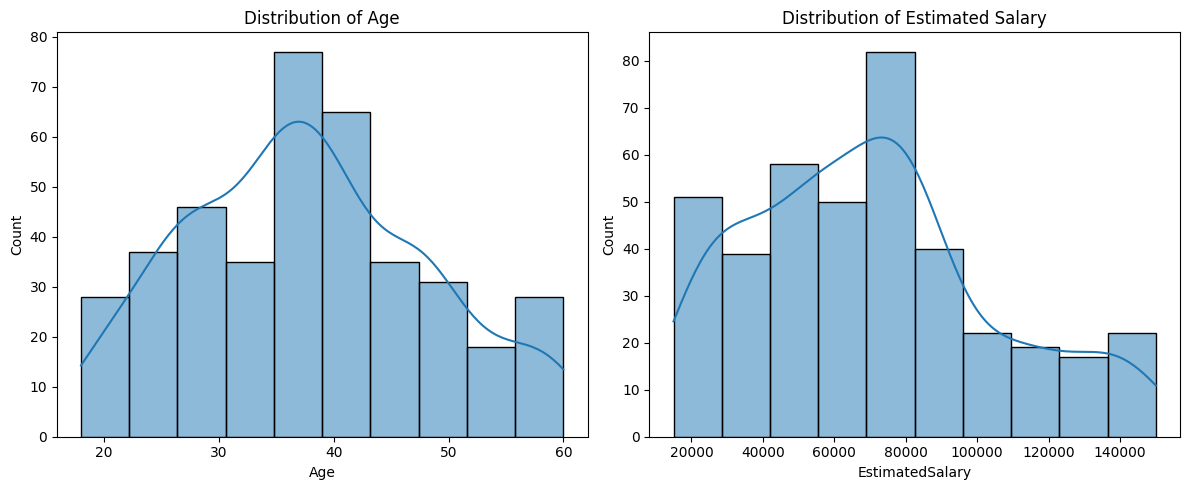

In [102]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df2['Age'], bins=10, kde=True, ax=ax1)
ax1.set_title('Distribution of Age')

sns.histplot(df2['EstimatedSalary'], bins=10, kde=True, ax=ax2)
ax2.set_title('Distribution of Estimated Salary')

plt.tight_layout()

- Distribution of Age
  - The distribution of age appears somewhat skewed to the right, possibly unimodal. There's a noticeable peak in the late 30s to early 40s age range.
  - The ages in the dataset seem to range roughly from the late teens/early 20s to around 60.
  - The bulk of the data points seem to be concentrated between the mid-20s and the mid-50s.

- Distribution of Estimated Salary
  - The distribution of estimated salary looks more complex, possibly multimodal. There seem to be several peaks, suggesting clusters of individuals with salaries in certain ranges.
  - The estimated salaries appear to range from around $20,000 to $160,000.
  - There's a notable concentration of individuals with salaries around the $60,000 to $90,000 range.

Text(0.5, 1.0, 'Purchase Distribution by Gender')

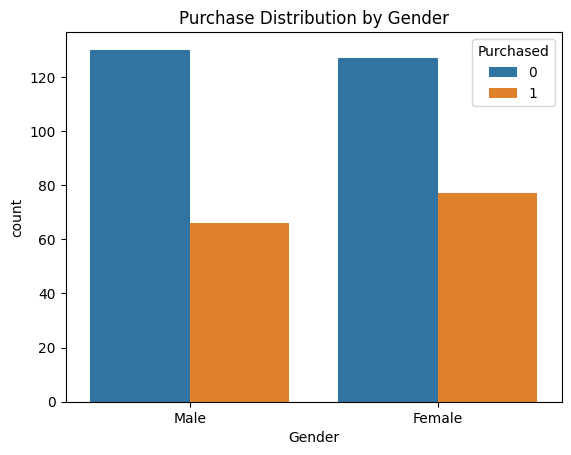

In [103]:
sns.countplot(x='Gender', hue='Purchased', data=df2)
plt.title('Purchase Distribution by Gender')

- There are more males who did not purchase compared to those who did purchase.
- there are more females who did not purchase compared to those who did purchase.
- The number of males who did not purchase is slightly higher than the number of females who did not purchase.
- The number of females who did purchase appears to be slightly higher than the number of males who did purchase.

In [104]:
# Drop User ID
df2.drop("User ID", axis=1, inplace=True)

# Encode Gender
le_gender = LabelEncoder()
df2["Gender"] = le_gender.fit_transform(df2["Gender"])  # Male=1, Female=0

# Encode target
y = df2["Purchased"]
X = df2[["Age", "EstimatedSalary"]]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (75/25)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

###Model Building

####Gaussian Naive Bayes

In [81]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)


####K-Nearest Neighbors (k = 3, 5, 7)

In [82]:
knn_results = {}
for k in [3, 5, 7]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    knn_results[k] = y_pred

####Decision Tree (Gini and Entropy)

In [85]:
from sklearn.tree import DecisionTreeClassifier

dt_gini = DecisionTreeClassifier(criterion="gini", random_state=42)
dt_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42)

dt_gini.fit(X_train, y_train)
dt_entropy.fit(X_train, y_train)

y_pred_gini = dt_gini.predict(X_test)
y_pred_entropy = dt_entropy.predict(X_test)


###Model Evaluation

In [86]:
def evaluate(y_true, y_pred, model_name):
    print(f"\n🔎 {model_name} Evaluation:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

evaluate(y_test, y_pred_nb, "Naive Bayes")

for k in [3, 5, 7]:
    evaluate(y_test, knn_results[k], f"KNN (k={k})")

evaluate(y_test, y_pred_gini, "Decision Tree (Gini)")
evaluate(y_test, y_pred_entropy, "Decision Tree (Entropy)")



🔎 Naive Bayes Evaluation:
Accuracy: 0.93
Precision: 0.9411764705882353
Recall: 0.8648648648648649
F1 Score: 0.9014084507042254
Confusion Matrix:
 [[61  2]
 [ 5 32]]

🔎 KNN (k=3) Evaluation:
Accuracy: 0.92
Precision: 0.8918918918918919
Recall: 0.8918918918918919
F1 Score: 0.8918918918918919
Confusion Matrix:
 [[59  4]
 [ 4 33]]

🔎 KNN (k=5) Evaluation:
Accuracy: 0.93
Precision: 0.8947368421052632
Recall: 0.918918918918919
F1 Score: 0.9066666666666666
Confusion Matrix:
 [[59  4]
 [ 3 34]]

🔎 KNN (k=7) Evaluation:
Accuracy: 0.93
Precision: 0.875
Recall: 0.9459459459459459
F1 Score: 0.9090909090909091
Confusion Matrix:
 [[58  5]
 [ 2 35]]

🔎 Decision Tree (Gini) Evaluation:
Accuracy: 0.83
Precision: 0.7777777777777778
Recall: 0.7567567567567568
F1 Score: 0.7671232876712328
Confusion Matrix:
 [[55  8]
 [ 9 28]]

🔎 Decision Tree (Entropy) Evaluation:
Accuracy: 0.83
Precision: 0.7777777777777778
Recall: 0.7567567567567568
F1 Score: 0.7671232876712328
Confusion Matrix:
 [[55  8]
 [ 9 28]]


In [95]:
# Define function to plot boundary
def plot_decision_boundary(clf, X, y, title):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(
        np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=1),
        np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=1000)
    )
    plt.figure(figsize=(8,5))
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.3, cmap=ListedColormap(('red', 'green')))
    plt.scatter(X_set[:, 0], X_set[:, 1], c=y, cmap=ListedColormap(('red', 'green')))
    plt.title(title)
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.show()

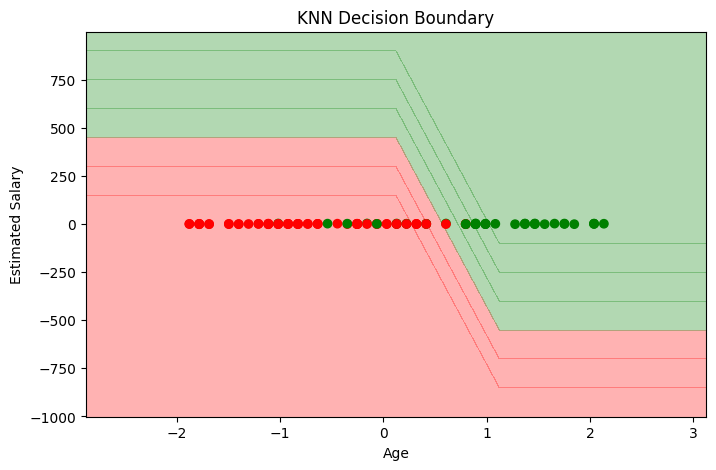

In [96]:
plot_decision_boundary(knn, X_test, y_test, "KNN Decision Boundary")

Most data points are being classifeid correctly - excpet for a few where some individuals with higher salaries are in not purchased cateogry and vice versa.

###Inference

✅ Best Performing Model: KNN (k=7)
- Accuracy: 93%

- F1 Score: 0.91 — best balance between precision and recalls.

- Excellent at identifying true buyers with highest recalls.

🔎 Naive Bayes
- Performs  well, especially but slightly lower recall.
- Good choice if false positives are costly.

⚠️ Decision Trees (Both Gini & Entropy)
- Underperform compared to others.
- Lower accuracy, F1, precision, and recall — maybe due to overfitting or poor generalization.